In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_json("https://api.covid19india.org/raw_data.json")

In [0]:
data = pd.json_normalize(df['raw_data'])

In [0]:
#data['dateannounced'] = data['dateannounced'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())
data['statuschangedate'] = data[data['statuschangedate'] != ""]['statuschangedate'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())

In [0]:
data['dateannounced'] = data[data['dateannounced'] != ""]['dateannounced'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())

In [0]:
data = data.dropna()

In [7]:
#first case in India
print("First case in India detected on:  {}".format(str(min(data['dateannounced']))))

First case in India detected on:  2020-01-30


In [8]:
print("Total Cases till date: {}".format(data.count()[0]))

Total Cases till date: 4668


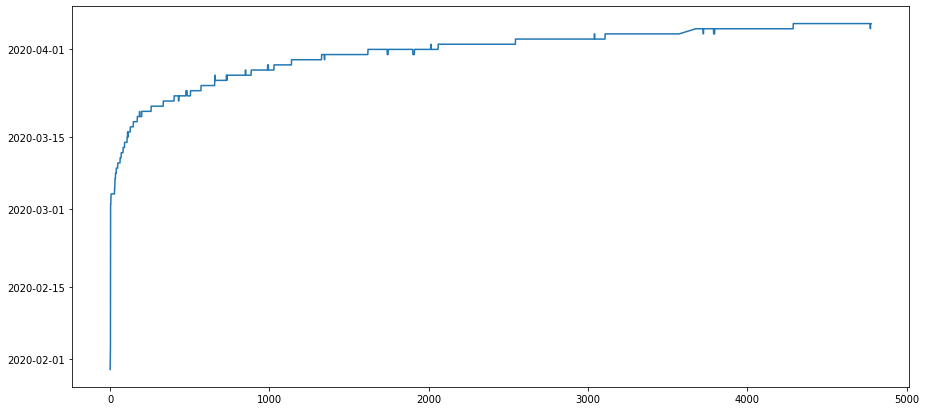

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(data['dateannounced'])
plt.show()

In [10]:
# data=data[data["agebracket"]!=""]
# data["agebracket"] = data["agebracket"].apply(lambda x: (int(str(x[0:2]))+int(str(x[3:5])))/2 if len(x) == 5 else x)
data_based_on_age = data[data["agebracket"].astype(str).str.isdigit()]
data_based_on_age.info

<bound method DataFrame.info of      agebracket  ... typeoftransmission
0            20  ...           Imported
3            45  ...           Imported
4            24  ...           Imported
5            69  ...           Imported
6            55  ...           Imported
...         ...  ...                ...
4373         43  ...                   
4501         19  ...                   
4682         45  ...                   
4683         70  ...                   
4756         32  ...                   

[946 rows x 20 columns]>

In [11]:
data_based_on_age["agebracket"] = data_based_on_age["agebracket"].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Age group')

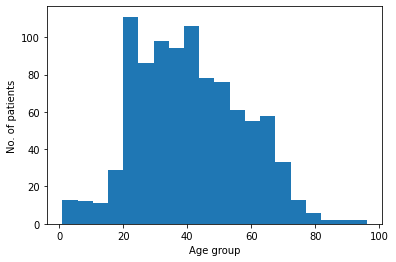

In [12]:
plt.hist(data_based_on_age["agebracket"], bins=20)
plt.ylabel("No. of patients")
plt.xlabel("Age group")

In [13]:
data_based_on_age.describe()

,agebracket
count,946.000000
mean,40.761099
std,16.735414
min,1.000000
25%,27.000000
50%,39.000000
75%,53.000000
max,96.000000


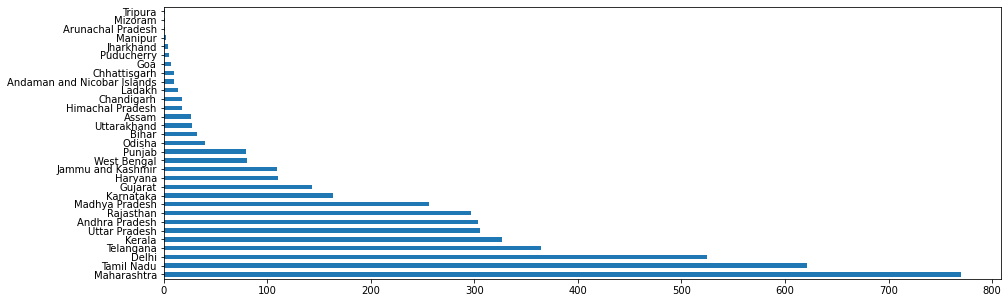

In [14]:
data['detectedstate'].value_counts().plot(kind='barh', figsize=(15,5))

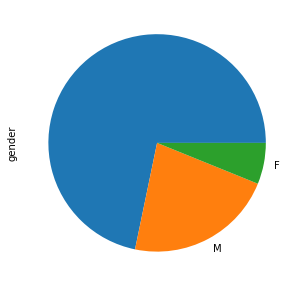

In [15]:
data['gender'].value_counts().plot(kind='pie', figsize=(15,5))

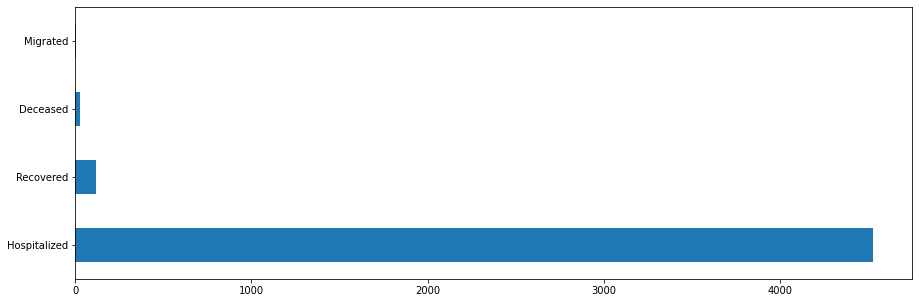

In [16]:
#Life expectancy
data['currentstatus'].value_counts().plot(kind='barh', figsize=(15,5))


In [17]:
#Life expectancy in Male
data[data['gender']=='M']['currentstatus'].value_counts()


Hospitalized    971
Recovered        46
Deceased         16
Name: currentstatus, dtype: int64

In [18]:
#Life expectancy in Female
data[data['gender']=='F']['currentstatus'].value_counts()


Hospitalized    254
Recovered        25
Deceased          7
Name: currentstatus, dtype: int64

In [37]:
#Top five affected District
data['detectedstate'].value_counts().head(5)

Maharashtra    770
Tamil Nadu     621
Delhi          525
Telangana      364
Kerala         327
Name: detectedstate, dtype: int64

In [19]:
#Top ten affected District
data['detecteddistrict'].value_counts().head(25)

                       875
Mumbai                 455
Kasaragod              152
Indore                 151
Pune                   132
Chennai                113
Jaipur                 100
Hyderabad               87
Thane                   78
Kurnool                 74
Ahmadabad               64
Coimbatore              63
Bhopal                  61
Gautam Buddha Nagar     61
Bengaluru               55
Kannur                  51
Agra                    49
Dindigul                45
S.P.S. Nellore          42
Tirunelveli             38
Mysuru                  35
Evacuees                35
Khordha                 32
Guntur                  32
Tiruchirappalli         31
Name: detecteddistrict, dtype: int64

In [20]:
#top reasons behind affection in India
data['notes'].value_counts().head(10)

Details awaited                                      1132
                                                     1119
Attended Delhi Religious Conference                   642
Details Awaited                                       432
Travelled from Dubai                                   79
Local Transmission                                     54
Travelled from UK                                      26
Travelled from Dubai, UAE                              25
attended religious event Tablighi Jamaat in delhi      24
Contact transmission                                   23
Name: notes, dtype: int64

In [21]:
data['typeoftransmission'].value_counts().head(10)

            2836
TBD          807
Imported     544
Local        481
Name: typeoftransmission, dtype: int64

Attended Delhi Religious Conference          67
Contact of Patient, ID Unknown                9
Details Awaited                               4
Family contact of TN-P42                      4
No Info                                       3
Contact of Positive Patient                   2
No Travel History                             2
Travelled from USA via London on 17 March     1
Family member of TN-P14                       1
Travelled from New Zealand                    1
Name: notes, dtype: int64


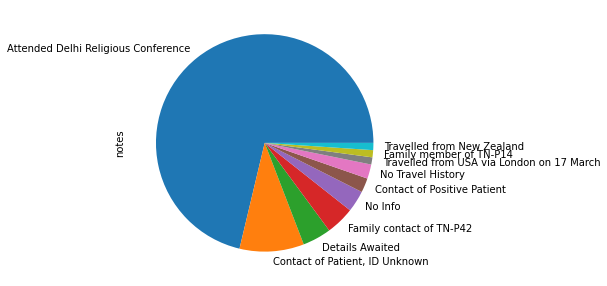

In [22]:
#Top reasons behind corona afefction in Chennai
print(data[data['detecteddistrict']=='Chennai']['notes'].value_counts().head(10))
data[data['detecteddistrict']=='Chennai']['notes'].value_counts().head(10).plot(kind='pie', figsize=(15,5))

Attended Delhi Religious Conference                              507
Contact of Patient, ID Unknown                                    18
Travelled from Delhi                                              10
Travelled from Delhi and Contact history with TN-P5 and TN-P6     10
Contact of Positive Patient                                        5
Family contact of TN-P42                                           4
Details Awaited                                                    4
No Info                                                            4
Indonesian Tourist                                                 4
                                                                   3
Name: notes, dtype: int64


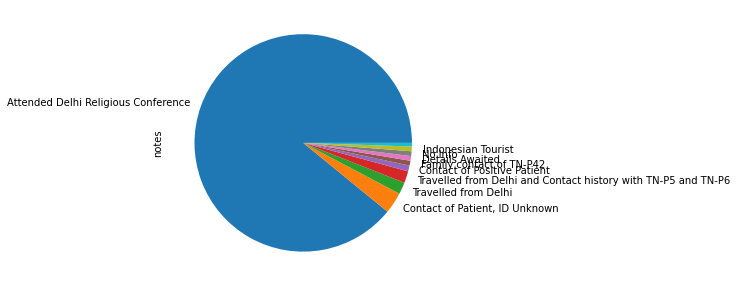

In [23]:
#Top reasons behind corona afefction in TamilNadu
print(data[data['statecode']=='TN']['notes'].value_counts().head(10))
data[data['statecode']=='TN']['notes'].value_counts().head(10).plot(kind='pie', figsize=(15,5))

In [0]:
data['time_taken_to_change_status'] = data['statuschangedate'] - data['dateannounced']

In [25]:
#Average time taken by to recover
time_taken_to_recover = data[(data['currentstatus'] == 'Recovered') & (data['time_taken_to_change_status'] != '0 days')]['time_taken_to_change_status']
print("Average time taken to recover {}".format(str(time_taken_to_recover.mode())))

Average time taken to recover 0    8 days
1   25 days
dtype: timedelta64[ns]


In [26]:
#Average time taken by to get deceased
time_taken_to_decease = data[(data['currentstatus'] == 'Deceased') & (data['time_taken_to_change_status'] != '0 days')]['time_taken_to_change_status']
print("Average time taken to get deceased {}".format(str(time_taken_to_decease.mean())))
print("Maximum time taken in case of deceased {}".format(str(time_taken_to_decease.max())))

Average time taken to get deceased 2 days 03:00:00
Maximum time taken in case of deceased 6 days 00:00:00


Text(0.5, 0, 'Age group')

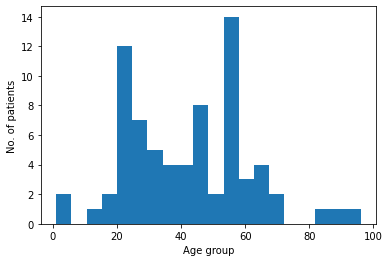

In [35]:
plt.hist(data_based_on_age[data_based_on_age['currentstatus'] == "Recovered"]["agebracket"], bins=20)
plt.ylabel("No. of patients recovered")
plt.xlabel("Age group")

Text(0.5, 0, 'Age group')

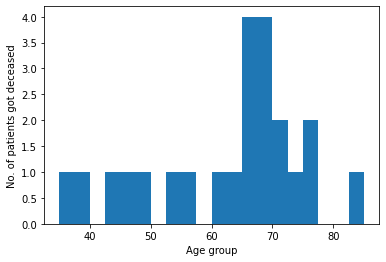

In [36]:
plt.hist(data_based_on_age[data_based_on_age['currentstatus'] == "Deceased"]["agebracket"], bins=20)
plt.ylabel("No. of patients got deceased")
plt.xlabel("Age group")

In [0]:
from datetime import date
data['patient_duration'] = date.today() - data['dateannounced']

In [28]:
#Hospitalized since
data[data['currentstatus'] == 'Hospitalized']['patient_duration'].value_counts()

1 days     601
3 days     559
0 days     487
4 days     486
2 days     477
5 days     424
6 days     305
7 days     186
10 days    149
9 days     138
8 days     104
14 days     86
12 days     83
16 days     69
13 days     68
11 days     65
15 days     62
17 days     56
19 days     22
18 days     22
23 days     16
20 days     14
21 days     12
26 days      7
24 days      6
33 days      5
25 days      5
27 days      4
28 days      4
22 days      3
30 days      2
32 days      1
Name: patient_duration, dtype: int64

In [29]:
#Top reasons behind corona afefction in top affected cities
for city in ["Mumbai", "Kasaragod", "Jaipur", "Indore", "Coimbatore", "Kannur", "Bengaluru"]:
  print("\n City name: ",city)
  print(data[data['detecteddistrict']==city]['notes'].value_counts().head(5))


 City name:  Mumbai
                                   206
Details awaited                    164
Details Awaited                     48
Travel history, details awaited      3
Contact Transmission                 3
Name: notes, dtype: int64

 City name:  Kasaragod
Travelled from Dubai                     47
Travelled from Dubai, UAE                19
Contact transmission                     17
Details awaited                          12
Contact transmission. details awaited    11
Name: notes, dtype: int64

 City name:  Jaipur
Details Awaited                                                                                            38
Contacts of first positive in Ramganj                                                                      13
Details awaited                                                                                            12
Family member of Patient, ID Unknown                                                                        8
Contacts of a person who ha

Conclusion: Metro cities are badly affected by Corona virus.
Kasargod is in worst condition even it is not metro city.
The main reason behind spread of Corona virus is Delhi religious conference and persons travelled from UK and Dubai. Average time taken to recover of patients is around 25 days. If patients is alive more than 5 days, then chances of recovery are high.